In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
pip install numpy


In [72]:
dataset=pd.read_csv('dataset (1).csv',header=1)

In [73]:
!pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable


In [74]:
dataset.head()






,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.3+ KB


In [76]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
dataset.loc[:122,"region"]=0
dataset.loc[122:,"region"]=1
df=dataset

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       248 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.2+ KB


In [79]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [80]:
df[['region']]=df[['region']].astype(int)

In [81]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [82]:
df.isnull().sum()

day            2
month          3
year           3
Temperature    3
 RH            3
 Ws            3
Rain           3
FFMC           3
DMC            3
DC             3
ISI            3
BUI            3
FWI            3
Classes        4
region         0
dtype: int64

In [83]:
df=df.dropna().reset_index(drop=True)

In [84]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [85]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [86]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [87]:
df=df.drop(122).reset_index(drop=True)

In [88]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [89]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [90]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [92]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [94]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [95]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [96]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [97]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [99]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [100]:
df.to_csv('dataset (1)cleaned.csv',index=False)

In [101]:
df_copy=df.drop(['day','month','year'],axis=1)
                

In [102]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [103]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [104]:
df_copy['classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [105]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,classes
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1,0


In [106]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [107]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [108]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
percentage=df_copy['classes'].value_counts(normalize=True)*100

In [109]:
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("pie chart of classes")
plt.show()

NameError: name 'percentage' is not defined

<Figure size 1200x700 with 0 Axes>

In [110]:
df_copy.corr()

ValueError: could not convert string to float: 'not fire   '

In [ ]:
sns.heatmap(df.corr())

In [111]:
import seaborn as sns

In [112]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df=pd.read_csv('dataset (1)cleaned.csv')

In [115]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [116]:
df.columns



Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [117]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [118]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [119]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [120]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [121]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [122]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [123]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [124]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [125]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.255,random_state=42)

In [127]:
x_train.shape,x_test.shape

((181, 11), (62, 11))

In [128]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.654843,-0.301927,-0.319812,0.695570,0.496104,0.389904,0.628839,0.471715,0.539878,0.251115
RH,-0.654843,1.000000,0.221523,0.243604,-0.653607,-0.412368,-0.234995,-0.717080,-0.360178,-0.454399,-0.392110
Ws,-0.301927,0.221523,1.000000,0.255629,-0.190054,0.006764,0.099678,-0.019147,0.041443,-0.075245,-0.194299
Rain,-0.319812,0.243604,0.255629,1.000000,-0.545926,-0.292120,-0.303220,-0.347370,-0.302999,-0.372789,-0.061049
FFMC,0.695570,-0.653607,-0.190054,-0.545926,1.000000,0.621550,0.524058,0.751210,0.607694,0.783156,0.249500
DMC,0.496104,-0.412368,0.006764,-0.292120,0.621550,1.000000,0.869068,0.684809,0.983145,0.615284,0.208772
DC,0.389904,-0.234995,0.099678,-0.303220,0.524058,0.869068,1.000000,0.513189,0.942766,0.543402,-0.063010
ISI,0.628839,-0.717080,-0.019147,-0.347370,0.751210,0.684809,0.513189,1.000000,0.642895,0.742452,0.294118
BUI,0.471715,-0.360178,0.041443,-0.302999,0.607694,0.983145,0.942766,0.642895,1.000000,0.610589,0.111159
Classes,0.539878,-0.454399,-0.075245,-0.372789,0.783156,0.615284,0.543402,0.742452,0.610589,1.000000,0.183919


<Axes: >

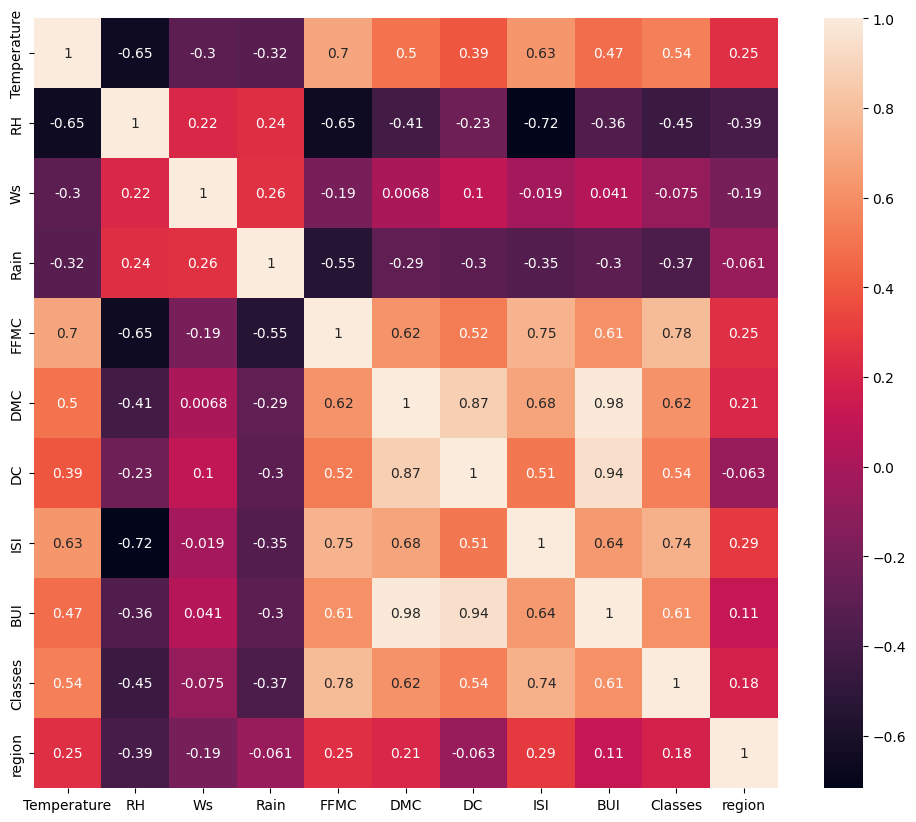

In [129]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [130]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.654843,-0.301927,-0.319812,0.695570,0.496104,0.389904,0.628839,0.471715,0.539878,0.251115
RH,-0.654843,1.000000,0.221523,0.243604,-0.653607,-0.412368,-0.234995,-0.717080,-0.360178,-0.454399,-0.392110
Ws,-0.301927,0.221523,1.000000,0.255629,-0.190054,0.006764,0.099678,-0.019147,0.041443,-0.075245,-0.194299
Rain,-0.319812,0.243604,0.255629,1.000000,-0.545926,-0.292120,-0.303220,-0.347370,-0.302999,-0.372789,-0.061049
FFMC,0.695570,-0.653607,-0.190054,-0.545926,1.000000,0.621550,0.524058,0.751210,0.607694,0.783156,0.249500
DMC,0.496104,-0.412368,0.006764,-0.292120,0.621550,1.000000,0.869068,0.684809,0.983145,0.615284,0.208772
DC,0.389904,-0.234995,0.099678,-0.303220,0.524058,0.869068,1.000000,0.513189,0.942766,0.543402,-0.063010
ISI,0.628839,-0.717080,-0.019147,-0.347370,0.751210,0.684809,0.513189,1.000000,0.642895,0.742452,0.294118
BUI,0.471715,-0.360178,0.041443,-0.302999,0.607694,0.983145,0.942766,0.642895,1.000000,0.610589,0.111159
Classes,0.539878,-0.454399,-0.075245,-0.372789,0.783156,0.615284,0.543402,0.742452,0.610589,1.000000,0.183919


In [131]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [132]:
corr_features=correlation(x_train,0.85)

In [133]:
corr_features

{'BUI', 'DC'}

In [134]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((181, 9), (62, 9))

In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [136]:
x_train_scaled

array([[-0.30617347,  0.65314346, -0.59271171, ..., -0.93251602,
        -1.11111111,  1.00554021],
       [ 2.12678546, -2.08217123, -0.21228327, ...,  2.71914673,
         0.9       ,  1.00554021],
       [-0.0358447 , -0.14743645,  0.92900205, ..., -0.60895096,
        -1.11111111, -0.99449032],
       ...,
       [-1.92814609,  0.92000343,  0.54857361, ..., -1.07118675,
        -1.11111111, -0.99449032],
       [ 0.50481284, -0.21415144,  0.16814517, ...,  0.59286209,
         0.9       ,  1.00554021],
       [-0.57650224,  0.98671842,  2.07028737, ..., -0.86318065,
        -1.11111111, -0.99449032]], shape=(181, 9))

Text(0.5, 1.0, 'x_train after Scaling')

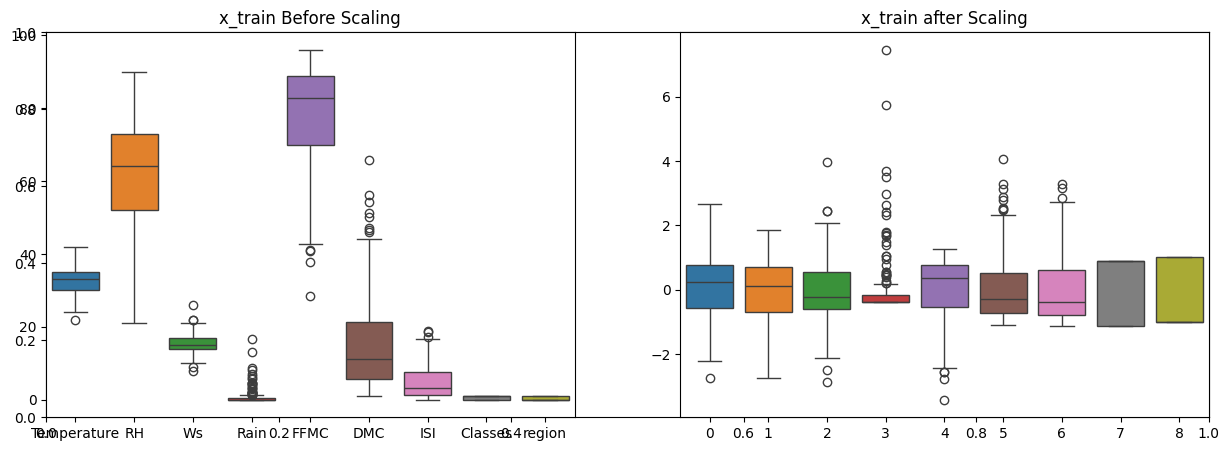

In [137]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after Scaling')

Mean absolute error 0.5394674722468609
R2 score 0.9849423736084301


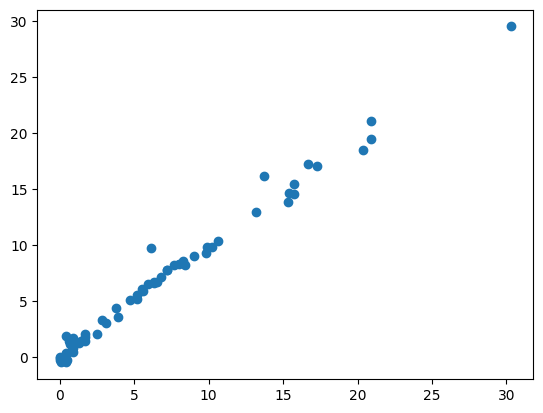

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1344748742517827
R2 Score 0.9493270590244052


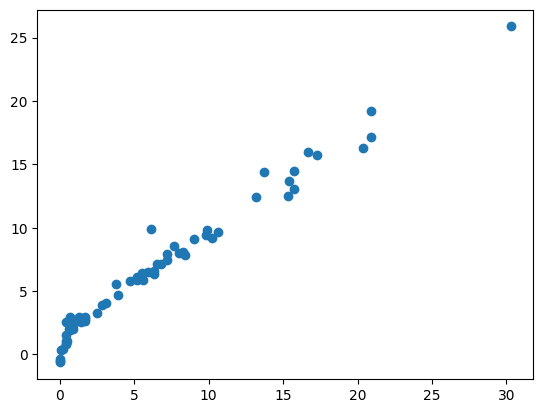

In [139]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [140]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [141]:
lassocv.alpha_


np.float64(0.057297628872071085)

In [142]:
lassocv.alphas_

array([7.06391949, 6.58783496, 6.14383693, 5.72976289, 5.34359605,
       4.98345556, 4.64758733, 4.3343555 , 4.04223445, 3.76980137,
       3.51572938, 3.27878098, 3.05780212, 2.85171649, 2.65952034,
       2.48027757, 2.31311517, 2.15721895, 2.01182961, 1.87623903,
       1.7497868 , 1.63185702, 1.52187532, 1.41930602, 1.32364954,
       1.23443999, 1.15124287, 1.07365295, 1.00129234, 0.93380858,
       0.87087301, 0.81217909, 0.75744093, 0.70639195, 0.6587835 ,
       0.61438369, 0.57297629, 0.5343596 , 0.49834556, 0.46475873,
       0.43343555, 0.40422344, 0.37698014, 0.35157294, 0.3278781 ,
       0.30578021, 0.28517165, 0.26595203, 0.24802776, 0.23131152,
       0.21572189, 0.20118296, 0.1876239 , 0.17497868, 0.1631857 ,
       0.15218753, 0.1419306 , 0.13236495, 0.123444  , 0.11512429,
       0.1073653 , 0.10012923, 0.09338086, 0.0870873 , 0.08121791,
       0.07574409, 0.07063919, 0.06587835, 0.06143837, 0.05729763,
       0.05343596, 0.04983456, 0.04647587, 0.04334355, 0.04042

In [143]:
lassocv.mse_path_

array([[52.54923481, 66.95119737, 54.89670869, 77.75340106, 39.45767508],
       [45.9946175 , 61.70971602, 49.22009899, 75.43405164, 35.3858005 ],
       [40.27635222, 55.63186585, 42.43439432, 68.15553821, 31.8317281 ],
       [35.29341476, 50.10992185, 36.62137911, 61.75187988, 28.72886034],
       [30.95072139, 44.25703513, 31.64840227, 56.11405791, 24.99269266],
       [27.16543711, 39.13683797, 27.40038866, 51.14692092, 21.62196675],
       [23.86545882, 34.65578577, 23.77780742, 45.14707376, 18.70724604],
       [20.98820147, 30.73250056, 20.69429138, 39.81213444, 16.1887653 ],
       [18.47903333, 27.29578008, 18.07509631, 35.15579046, 14.01344238],
       [16.29046035, 24.28447362, 15.85538338, 31.09028941, 12.13556111],
       [14.38114435, 21.64438902, 13.9794328 , 27.53972791, 10.51542888],
       [12.71504186, 19.32858969, 12.39867766, 24.43801831,  9.11858714],
       [11.26096123, 17.29615734, 11.07124117, 21.72710402,  7.91484098],
       [ 9.99156603, 15.51141435,  9.9

Mean absolute error 0.6143318921694984
R2 score 0.9822765461903725


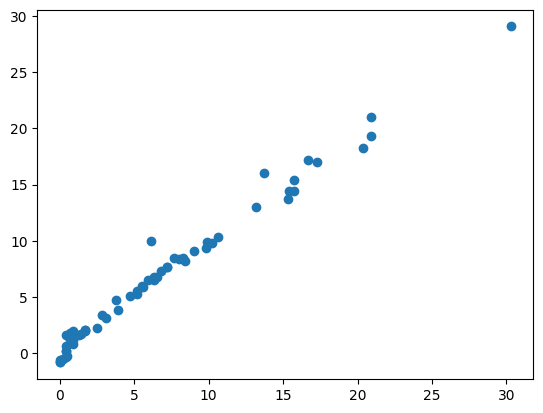

In [144]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 0.5563705055481857
R2 score 0.9844815852290907


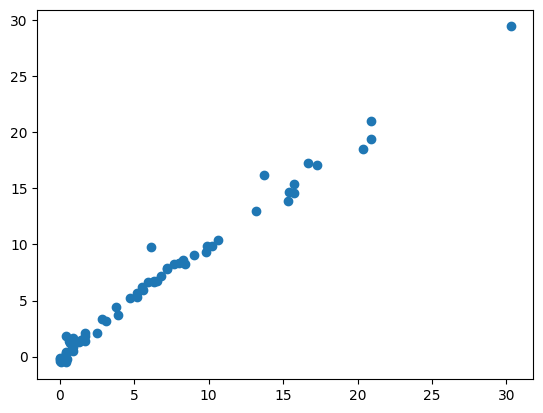

In [145]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5563705055481857
R2 Score 0.9844815852290907


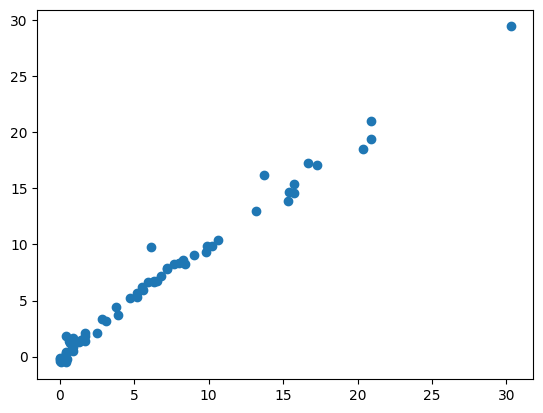

In [146]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)

y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mean=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)

Mean absolute error 1.8716599241389178
R2 Score 0.8763912764449489


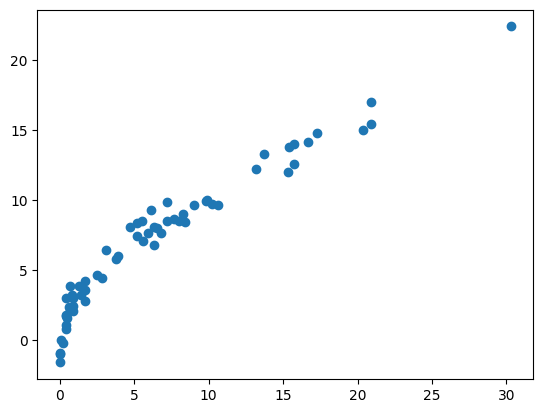

In [147]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean asbolute error 0.6484290931013383
R2 Score 0.9816469586330597


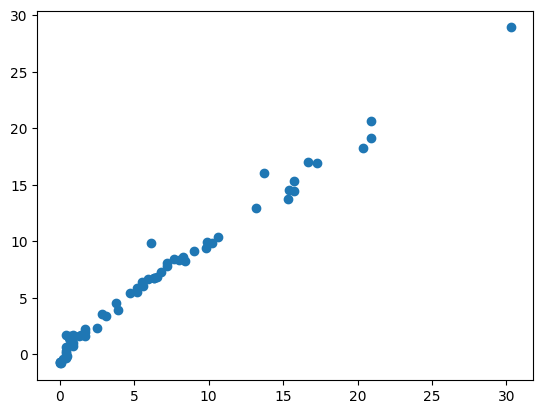

In [148]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean asbolute error",mae)
print("R2 Score",score)

In [149]:
##pickle

In [150]:
scaler


StandardScaler()

In [151]:
ridge

Ridge()

In [153]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))